In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
%matplotlib inline

In [66]:
def ROC(path):
    df = pd.read_csv(path)
    df.head()
    
    truth = np.array(df)[:,0]
    test = np.array(df)[:,1]
    zeros = np.count_nonzero(truth==0)
    ones = len(truth)-zeros
    mydict = list(zip(test, truth))
    mydict_sorted = mydict[:]
    mydict_sorted.sort()

    # Q(1) solution
    PD1 = []
    PFA1 = []
    PD1.append(1)
    PFA1.append(1)
    for k,v in mydict_sorted:
        D1 = 0
        FA1 = 0
        for test, truth in mydict_sorted:
            if test >= k and truth == 1:
                D1 += 1
            elif test >= k and truth == 0:
                FA1 += 1
        PD1.append(D1/ones)
        PFA1.append(FA1/zeros)
    PD1.append(0)
    PFA1.append(0)

    # Q(2) solution
    PD2 = []
    PFA2 = []
    PD2.append(1)
    PFA2.append(1)
    minlam = mydict_sorted[0][0]
    maxlam = mydict_sorted[-1][0]
    dist = (maxlam - minlam)/98
    for i in range(0,99):
        D2 = 0
        FA2 = 0
        k = minlam + i * dist
        for test, truth in mydict_sorted:
            if test >= k and truth == 1:
                D2 += 1
            elif test >= k and truth == 0:
                FA2 += 1
        PD2.append(D2/ones)
        PFA2.append(FA2/zeros)   
    PD2.append(0)
    PFA2.append(0)

    # Q(3) solution
    PD3 = []
    PFA3 = []
    thld3 = []
    length = df.shape[0]
    for k,v in mydict_sorted:
        thld3.append(k)
    PD3.append(1)
    PFA3.append(1)
    m = 0
    n = length//100
    if n == 0:
        n = 1
    iternum = 99
    if df.shape[0]<99:
         iternum= df.shape[0]
    for i in range(0,iternum):
        D = 0
        FA = 0
        m =  n * i
        for test, truth in mydict_sorted:
            if test >= thld3[m] and truth == 1:
                D += 1
            elif test >= thld3[m] and truth == 0:
                FA += 1
        PD3.append(D/ones)
        PFA3.append(FA/zeros)   
    PD3.append(0)
    PFA3.append(0)
    
    # Q(4) solution
    PD4 = []
    PFA4 = []
    thld4 = []
    for k,v in mydict:
        if v==0:
            thld4.append(k)
    thld4.sort()
    PD4.append(1)
    PFA4.append(1)
    for k in thld4:
        D = 0
        FA = 0
        for test, truth in mydict_sorted:
            if test >= k and truth == 1:
                D += 1
            elif test >= k and truth == 0:
                FA += 1
        PD4.append(D/ones)
        PFA4.append(FA/zeros)   
    PD4.append(0)
    PFA4.append(0)
    PD5 = []
    PFA5 = []
    
    # Q(5) solution
    PD5.append(1)
    PFA5.append(1)
    num = df.shape[0]
    for k in range(0,101):
        D = 0
        FA = 0
        k = 0.01 * num * i
        for test, truth in mydict_sorted:
            if test >= k and truth == 1:
                D += 1
            elif test >= k and truth == 0:
                FA += 1
        PD5.append(D/ones)
        PFA5.append(FA/zeros)   
    PD5.append(0)
    PFA5.append(0)
    
    #plot ROC curves
    plt.figure()
    plt.plot(PFA1, PD1, color='darkorange',
         linewidth = 1, label='ROC curve of Q(1)')
    plt.plot(PFA2, PD2, color='b',
         linewidth = 1, label='ROC curve of Q(2)')
    plt.plot(PFA3, PD3, color='green',
        linewidth = 1, label='ROC curve of Q(3)')
    plt.plot(PFA4, PD4, color='red',
        linewidth = 1, label='ROC curve of Q(4)')
    plt.plot(PFA4, PD4, color='m',
      linewidth = 1, label='ROC curve of Q(5)')
    plt.plot([0, 1], [0, 1], color='navy', linewidth = 1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Probability of False Alarm')
    plt.ylabel('Probability of Detection')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

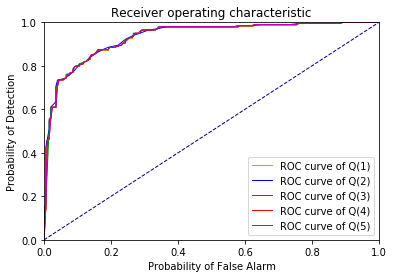

In [52]:
ROC('moderateData.csv')

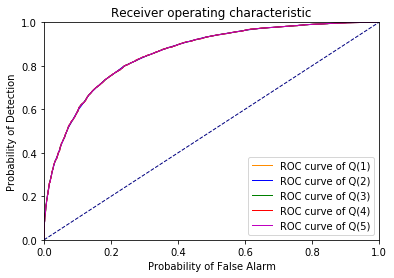

In [36]:
ROC('bigData.csv')

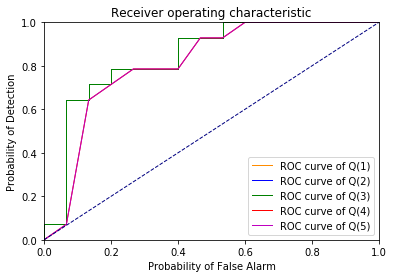

In [67]:
ROC('smallData.csv')

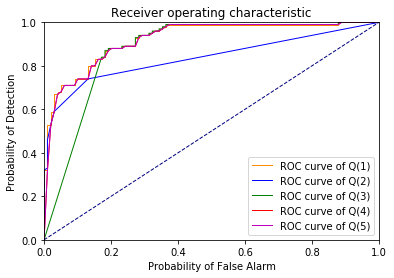

In [38]:
ROC('logNormalData.csv')

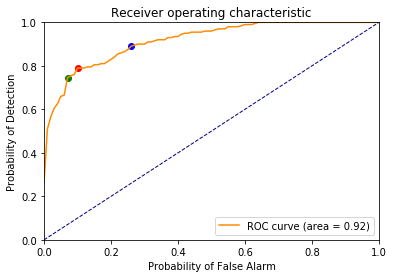

In [48]:
df = pd.read_csv('rocData.csv')
PFA = np.array(df)[:,0]
PD = np.array(df)[:,1]

# Point 1
mydict = dict()
for i in range(0,len(PFA)):
    Pcd = 0.5 * (1 - PFA[i]) + 0.5 * PD[i]
    mydict[Pcd] = i
x = PFA[mydict[max(mydict)]]
y = PD[mydict[max(mydict)]]

# Point 2
mydict1 = dict()
for i in range(0,len(PFA)):
    Pcd =  (1 - PFA[i])/3 + 2 * PD[i]/3
    mydict1[Pcd] = i
x1 = PFA[mydict1[max(mydict1)]]
y1 = PD[mydict1[max(mydict1)]]

# Point 3
mydict2 = dict()
for i in range(0,len(PFA)):
    Pcd =  2 * (1 - PFA[i])/3 + PD[i]/3
    mydict2[Pcd] = i
x2 = PFA[mydict2[max(mydict2)]]
y2 = PD[mydict2[max(mydict2)]]

from sklearn.metrics import roc_curve, auc

# Plot
plt.figure()
plt.plot(PFA,PD,label='ROC curve (area = %0.2f)' % auc(PFA,PD), c = 'darkorange')
plt.plot([0, 1], [0, 1], color='navy', linewidth = 1, linestyle='--')
plt.scatter(x, y, c='red')
plt.scatter(x1, y1, c='blue')
plt.scatter(x2, y2, c='green')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Probability of False Alarm')
plt.ylabel('Probability of Detection')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()